In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from pluto_jm import pyPLUTO as pp
import numpy as np 
import matplotlib as mpl
import os, sys
import matplotlib.colors as mplcolors
from sklearn.cluster import DBSCAN
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline

Comment here


[]

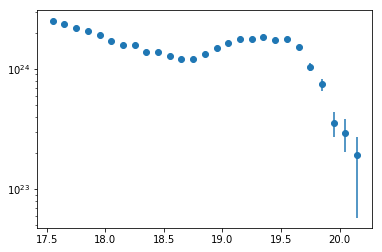

In [50]:
logE, n, dn1, dn2 = np.loadtxt("auger.dat", unpack=True)

Elinear = 10.0**logE
plt.errorbar(logE, Elinear**2 * n, yerr=(Elinear**2*dn1,Elinear**2*dn2), fmt="o")
plt.semilogy()

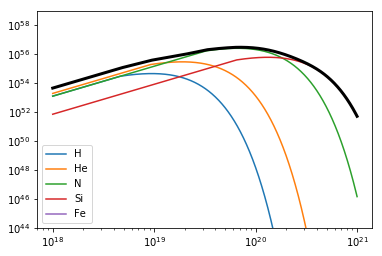

In [51]:
def dn_dE(E, gamma=2, R_cut=1e19, Z=1, f_A=1, J0=1):
    x = f_A * J0 * (E/1e18)**-gamma
    x *= fcut(E, Z, R_cut)
    return x

def fcut(E, Z, R_cut):
    if isinstance(E, float):
        if E < Z * R_cut:
            return 1
        else:
            return np.exp(1.0 - E/Z/R_cut)
    else:
        x = np.ones_like(E)
        select = (E > Z * R_cut)
        x[select] *= np.exp(1.0 - E[select]/Z/R_cut)
        return x
    
    
def make_plot(Zs, names, fracs, gamma, rcut, weights):
    E = np.logspace(18,21,num=1000)
    mysum = 0.0
    for i in range(len(Zs)):
        flux = dn_dE(E, gamma=gamma, R_cut=rcut, Z=Zs[i], f_A=fracs[i], J0=1) * weights[i]
        plt.plot(E, E**3 * flux, label=names[i])
        mysum += flux
        
    plt.plot(E, E**3 * mysum, c="k", linewidth=3) 
    plt.loglog()
    plt.legend()
    plt.ylim(1e44,1e59)

    
        
mysum = 0.0
Zs = [1,2,7,14,26]
names = ["H", "He", "N", "Si", "Fe"]
fracs = [0.125,0.586,0.246,0.042,0.0]
rcut = 10.0**18.66
gamma = 0.93
weights = [1.0, 0.328, 0.504, 0.168, 0.0]

make_plot(Zs, names, fracs, gamma, rcut, weights)

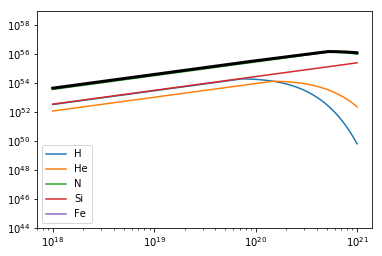

In [52]:
mysum = 0.0
Zs = [1,2,7,14,26]
names = ["H", "He", "N", "Si", "Fe"]
fracs = [0.033, 0.036, 0.721, 0.209, 0.0]
rcut = 10.0**19.86
gamma = 2.05

make_plot(Zs, names, fracs, gamma, rcut, weights)